# Arbrawf Ymbelydredd Rhithwir

Mae'r llyfr hwn yn efelychu arbrawf dadfeiliad ymbelydrol. Rhaid i chi redeg y celloedd mewn trefn - ond cofiwch fod angen rhoi rhifau i mewn i rai ohonynt. Mae cyfarwyddiadau a chwestiynau penodol i'w hystyried yn cael eu cyflwyno mewn <font color="red">**testun coch**</font>.

Mae'r adran gyntaf hon yn llwytho rhai "modiwlau", sy'n ddarnau o god y bydd angen i ni eu defnyddio yn nes ymlaen. Mae angen i ni redeg hyn cyn y gallwn ddechrau

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random

## Adran 1 - Sefydlu'r arbrawf

Mae'r adran hon yn sefydlu'r arbrawf rydyn ni'n mynd i'w redeg. Dyma'r paramedrau y byddwn yn gweithio gyda.

Enghreifftiau o gysonion dadfeilio (yn gysylltiedig â thebygolrwydd y bydd unrhyw atom yn dadfeilio mewn cyfnod amser penodol) ar gyfer rhai isotopau. Defnyddir y fformat "llaw-fer" yn gyffredin mewn cyfrifiadura i ddynodi nodiant gwyddonol. Felly, er enghraifft, mae 3.4e-2 yn yr un peth a $3.4 \times 10^{-2}$ (neu 0.034)
 * $^{14}$C   : 3.84e-12 s$^{-1}$
 * $^{15}$C   : 2.83e-1 s$^{-1}$
 * $^{24}$Na  : 1.28e-5 s$^{-1}$
 * $^{131}$I  : 9.94e-7 s$^{-1}$
 * $^{210}$Po : 5.73e-8 s$^{-1}$
 * $^{214}$Po : 4.33 s$^{-1}$
 * $^{214}$Bi : 5.78e-4 s$^{-1}$
 * $^{218}$Po : 3.73e-3 s$^{-1}$
 * $^{222}$R  : 2.11e-6 s$^{-1}$
 * $^{226}$Ra : 1.37e-11 s$^{-1}$
 * $^{234}$Pa : 9.63e-3 s$^{-1}$
 * $^{234}$U  : 9.16e-14 s$^{-1}$
 * $^{238}$U  : 4.88e-18 s$^{-1}$
 


<p><b><font color="red">Bydd angen i chi nodi rhai rhifau er mwyn iddo weithio. Os ydych chi am newid nifer yr atomau rydych chi'n eu defnyddio, bydd yn rhaid i chi newid y rhifau hyn.</font></b></p>

In [0]:
# Rhowch nifer o atomau i'w efelychu yn yr arbrawf.
totalNumberOfAtoms = NODWCH_RHIF

# Y siawns y bydd atom unigol yn dadfeilio'r eiliad.
# Cofiwch fod hyn yn debygolrwydd felly mae'n rhaid iddo fod yn llai nag 1
decayConstant = NODWCH_GYSONYN_PYDREDD

## Adran 2 - Sefydlu Cofnodi Data

Yn yr adran hon byddwn yn sefydlu faint o amser rydyn ni'n mynd i redeg amdano, a'r cyfnod rhwng darlleniadau. Cofiwch nad yw hyn yn cael ei redeg mewn "amser real", felly gall y rhain fod yn fyr iawn neu'n hir iawn.

<font color="red">**Os ydych chi am ail-redeg yr arbrawf (gyda'r un atomau), bydd yn rhaid i chi ail-redeg y gell hon.**</font>

In [1]:
# Bydd yr araeau gwag hyn yn cael eu defnyddio yn nes ymlaen.
# Dim ond rhestr o rifau yw arae, ac maen nhw'n rhan bwysig o godio
# - yn enwedig mewn gwyddoniaeth!

# Rhowch hyd am y nifer o eiliadau i redeg yr arbrawf.
# Dylai hwn fod yn gyfanrif (h.y. rhif cyfan)
experimentDuration = NODWCH_HYD
timeInterval = NODWCH_CYFNOD_RHWNG_DARLLENIADAU

numberOfSteps=int(experimentDuration/timeInterval)
timeStepArray = np.zeros(numberOfSteps)
numberOfUndecayedAtomsArray = np.zeros(numberOfSteps)
numberOfDecayedAtomsArray = np.zeros(numberOfSteps)

# Mae'r llinell nesaf hon yn sefydlu "arae" o'r atomau - yn yr achos hwn un rhif i bob atom.
# Mae'r niferoedd i gyd yn dechrau fel 1 - a dyna sut rydyn ni'n cofnodi bod yr atomau heb ddadfeilio.
# Nes ymlaen, bydd y niferoedd yn newid i 0 - a dyna sut rydyn ni'n cofnodi eu bod nhw wedi dadfeilio.
atoms = np.ones(totalNumberOfAtoms)

# Mae ein harbrawf wedi'i sefydlu!
print('Bydd yr arbrawf yn creu {} darlleniad bob {} s.'.format(numberOfSteps,timeInterval))
print('Cyfanswm Hyd: {} s'.format(experimentDuration))


NameError: ignored

## Adran 3 - Cynnal yr arbrawf

Yn yr adran hon byddwn yn cynnal yr arbrawf.

Dolen 'for' yw hon, ac mae'n ailadrodd yr un peth dro ar ôl tro cyhyd ag y mae ei angen arnom. Bydd yn camu ymlaen unwaith yr eiliad o sero tan 'experimentDuration', ac yn gwneud yr un peth bob tro.

Nid oes angen i chi boeni am yr hyn sy'n digwydd yma.

In [3]:
print('Arbrawf yn rhedeg ...')
# Yn gyntaf, camwch trwy'r camau amser
for t in range(numberOfSteps): 
    # cofnodi'r amser ar y cam hwn
    timeStepArray[t] = t*timeInterval

    # cyfrif nifer yr atomau heb eu talu, trwy adio'r holl rifau yn yr arae "atomau"
    # (Cofiwch fod 1 = heb ddadfeilio, 0 = wedi dadfeilio)
    numberOfUndecayedAtomsNow = np.sum(atoms)
    numberOfDecayedAtomsNow = totalNumberOfAtoms - numberOfUndecayedAtomsNow
    numberOfUndecayedAtomsArray[t] = numberOfUndecayedAtomsNow
    numberOfDecayedAtomsArray[t] = numberOfDecayedAtomsNow

    # Ar bob cam, ewch trwy'r holl atomau a phenderfynu a ydyn nhw wedi dadfeilio
    for atom in range(totalNumberOfAtoms):
        # cynhyrchwch rif ar hap rhwng 0 ac 1
        randomNumber = random.uniform(0, 1)
        
        # Penderfynwch a yw'r atom wedi dadfeilio, a rhoi 0 yn lle'r 1 os yw wedi gwneud hynny.
        decayProbability = 1-np.exp(-decayConstant*timeInterval)
        if(randomNumber <= decayProbability):
            atoms[atom] = 0

print("Arbrawf wedi'i gwblhau")

Arbrawf yn rhedeg ...


NameError: ignored

## Adran 4 - Cyflwyno'r Data Crai

Mae'r rhagddodiad "plt." a ddefnyddir yma yn cael ei defnyddio i greu graffiau a phlotiau, ac mae'n defnyddio'r pecyn "pyplot" a fewnforiwyd gennym ar ddechrau'r llyfr.

Bydd hyn yn creu plot yn dangos nifer yr atomau heb ddadfeilio ar bob cam amser, a dylai ddilyn cromlin.

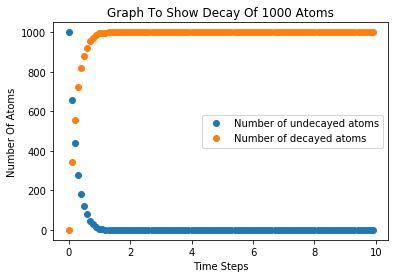

In [0]:
# Mae'r adran hon ar hap yn dewis rhif rhwng 0 ac 1 ar gyfer pob atom ar bob cam amser, ac os yw'r rhif hwnnw'n is na'r
#lefel a osodwyd gennych yn gynharach, bydd yr atom yn dadfeilio. Dylai hyn greu ein dadfeiliad "hanner oes", a gallwn wirio hyn trwy gynllwynio
# y canlyniadau ar graff

plt.figure(1)
plt.title('Graff I Ddangos Dadfeiliad O ' + str(totalNumberOfAtoms) + ' Atomau')
plt.xlabel('Camau amser')
plt.ylabel('Nifer o Atomau')

plt.plot(timeStepArray, numberOfUndecayedAtomsArray, 'o',label='Nifer o atomau heb ddadfeilio')
plt.plot(timeStepArray, numberOfDecayedAtomsArray, 'o',label='Nifer o atomau wedi dadfeilio')
plt.legend()
plt.show()

## Adran 5 - Creu'r Modelau

Gallwn greu modelau i'w cymharu â'r data. Isod mae sawl model damcaniaethol, y mae pob un ohonynt yn cael eu nodweddu gan yr "hanner oes" - yr amser mae'n ei gymryd i hanner yr atomau dadfeilio. Y modelau y gallwch eu dewis yw:
 * **DadfeiliadLlinol** - cyfradd dadfeiliad cyson
 * **DadfeiliadGwrthdro** - mae nifer yr atomau sydd heb ddadfeilio mewn cyfrannedd gwrthdro ag amser
 * **DadfeiliadGwrthdroSgwâr** - mae nifer yr atomau sydd heb ddadfeilio mewn cyfrannedd gwrthdro â'r sgwâr amser
 * **DadfeiliadCwadratig** - mae nifer yr atomau sydd heb ddadfeilio yn gymesur â'r amser sgwâr
 * **DadfeiliadEsbonyddol** - mae nifer yr atomau sydd heb ddadfeilio yn gostwng yn esbonyddol

In [0]:
#Creu model lle mae'r un nifer o atomau yn dadfeilio bob eiliad
def DadfeiliadLlinol(timeArray,HalfLife):
    expectedUndecayedAtoms = totalNumberOfAtoms*(1 - 0.5*timeArray/HalfLife)
    # Sicrhewch nad yw'n mynd yn is na sero
    expectedUndecayedAtoms = np.where(expectedUndecayedAtoms<0,0,expectedUndecayedAtoms)
    return expectedUndecayedAtoms

#Creu model lle mae'r nifer yn gostwng gan ddilyn 1/amser, gyda "Half Life" (Hanner oes)
def DadfeiliadGwrthdro(timeArray,HalfLife):
    expectedUndecayedAtoms = totalNumberOfAtoms * 1 / ( 1 + timeArray/HalfLife)
    return expectedUndecayedAtoms

#Creu model lle mae'r nifer yn gostwng gan ddilyn 1/amser^2, gyda "Half Life" (Hanner oes)
def DadfeiliadGwrthdroSgwar(timeArray,HalfLife):
    decayConstant=(np.sqrt(2)-1)/HalfLife
    expectedUndecayedAtoms = totalNumberOfAtoms * 1 / ( 1 + timeArray*decayConstant)**2
    return expectedUndecayedAtoms

#Creu model lle mae'r nifer yn gostwng gan ddilyn amser^2
def DadfeiliadCwadratig(timeArray,HalfLife):
    decayConstant=np.sqrt(0.5*totalNumberOfAtoms)/HalfLife
    expectedUndecayedAtoms = totalNumberOfAtoms - (timeArray*decayConstant)**2
    # Sicrhewch nad yw'n mynd yn is na sero
    expectedUndecayedAtoms = np.where(expectedUndecayedAtoms<0,0,expectedUndecayedAtoms)
    return expectedUndecayedAtoms

#Creu model lle mae'r nifer yn gostwng yn esbonyddol
def DadfeiliadEsbonyddol(timeArray,HalfLife):
    expectedUndecayedAtoms = totalNumberOfAtoms * np.exp(-np.log(2) * timeArray/HalfLife)
    return expectedUndecayedAtoms

## Adran 6 - Cymharu'r model â'r data

<font color="red">**Dewiswch y model o'r opsiynau uchod a gosodwch yr hanner oes.**</font>

Mae graff yn cael ei blotio, gan gymharu'r data a'r model damcaniaethol rydych chi'n ei ddewis.

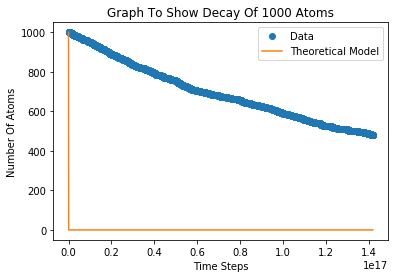

In [0]:
# Dewiswch enw'r model o'r opsiynau uchod.
# Rhaid i enw'r model gyfateb yn union, gan gynnwys y priflythrennau

theoreticalModel = DadfeiliadLlinol
# Gosodwch eich hanner oes mewn eiliadau
HalfLife=100

plt.figure(1)
plt.title('Graff I Ddangos Dadfeiliad O ' + str(totalNumberOfAtoms) + ' Atomau')
plt.xlabel('Camau amser')
plt.ylabel('Nifer o Atomau')


plt.plot(timeStepArray, numberOfUndecayedAtomsArray,'o',label='Data')

plt.plot(timeStepArray,theoreticalModel(timeStepArray,HalfLife),label='Model Damcaniaethol')


plt.legend()
plt.show()

<font color="red">**Newidiwch baramedrau eich model, a'r model rydych yn defnyddio. Ail-redeg y gell uchod i weld a allwch chi ffitio'n well i'r data.**</font>

<font color="red">**Beth sy'n digwydd os byddwch chi'n newid y paramedrau ar y dechrau yn adrannau 1 a 2, ac yn ail-redeg yr arbrawf. A yw'ch model yn dal i weithio?**</font>

## Adran 7 - Creu ffit well

Yn yr adran hon, byddwn yn gweld a allwn gael gwerth ffit orau ar gyfer y model a ddewiswyd gennym, a gweld sut y mae'n cymharu â'n gwerth blaenorol. Mae'r ffwythiant ```curve_fit``` yn gadael i ni ddod o hyd i'r gwerth ffit gorau ar gyfer ein data, ond dim ond os ydyn ni'n rhoi model synhwyrol iddo.

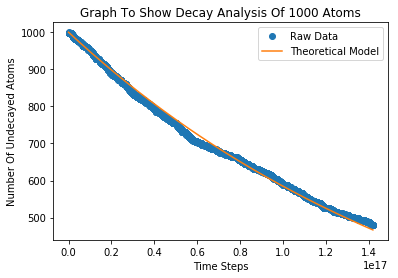

--------
Best fit Half Life for ExponentialDecay model:
  1.2905874760488293e+17 s
--------


In [0]:
plt.title('Graff I Ddangos Dadansoddiad Dadfeiliad O ' + str(totalNumberOfAtoms) + ' Atomau')
plt.xlabel('Camau amser')
plt.ylabel('Nifer o atomau heb ddadfeilio')

# Dewiswch fodel damcaniaethol oddi uchod
theoreticalModel = DadfeiliadEsbonyddol

# dod o hyd i'r gwerthoedd ffit orau
[bestfitHalfLife], pcov = curve_fit(theoreticalModel,timeStepArray, numberOfUndecayedAtomsArray,(1/decayConstant))
                    
plt.plot(timeStepArray, numberOfUndecayedAtomsArray, 'o', label = 'Data Craidd')
plt.plot(timeStepArray, theoreticalModel(timeStepArray, bestfitHalfLife), label = 'Model Damcaniaethol')

plt.legend(loc = 'best')
plt.show()
print('--------')
print('Ffit gorau Hanner Oes am {} model:\n  {} s'.format(theoreticalModel.__name__,bestfitHalfLife))
print('--------')

<font color="red">**Sut mae hynny'n cyd-fynd â'r amcangyfrif a wnaethoch uchod? Ydych chi'n meddwl bod y model a ddewisoch yn dda?**</font>

In [0]:
import numpy as np
Cysonyn_dadfeilio = 3.84e-12 #Carbon-14
Hanner_oes = np.log(2) / Cysonyn_dadfeilio
Hanner_oes_blynyddoedd = Hanner_oes / (365 * 24 * 60 * 60)
print("Hanner oes Carbon-14 yw " + str(Half_life_years) + " mlynedd")

The half life of Carbon-14 is 5723.841903564786 years
